## Импорт библиотек ##

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Импорт модели из зоопарка моделей Keras ##

Для того чтобы получить доступ к реализованным моделям, достаточно обратится к tf.keras.applications. 

Например, попробуем определить знакому нам VGG19

In [23]:
# в аргументе weights мы указываем обученными на каких данных весами наделить модель  
vgg19 = tf.keras.applications.VGG19(weights='imagenet')

# каждая модель имеет свой уникальний препроцессинг и декодинг

# модуль преобразует данные в удобный для модели формат
from tensorflow.keras.applications.vgg19 import preprocess_input
# модель помогает правильно читать предсказания
from tensorflow.keras.applications.vgg19 import decode_predictions

# следует проверить какие размеры ожидает модель
vgg19.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_5')>

In [24]:
# функция меняет размер изображения
def prepare_image(image, image_size):
    image = tf.image.resize(image, image_size)
    return image[None, ...]

In [ ]:
# скачаем несколько картинок
!wget https://github.com/qubvel/efficientnet/raw/master/misc/panda.jpg -O panda.jpg
!wget https://5.imimg.com/data5/CB/DA/MY-24779561/cricket-tennis-balls-500x500.jpg -O ball.jpg
!wget https://image.shutterstock.com/image-photo/luxury-house-beautiful-landscaping-on-260nw-448870624.jpg -O house.jpg

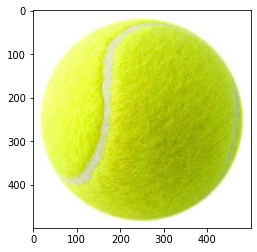

In [26]:
# выведем одну из них
ball = plt.imread('/content/ball.jpg')
plt.imshow(ball)
plt.show()

In [38]:
# Проведем инференс
input_image = prepare_image(ball, (224, 224))
input_image = preprocess_input(input_image)
prediction = vgg19.predict(input_image)

print('\tКласс:', decode_predictions(prediction)[0][0][1:][0], '\tВероятность:', decode_predictions(prediction)[0][0][1:][1])

1/1 [==============================] - 1s 509ms/step
	Класс: tennis_ball 	Вероятность: 0.999806
